In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [4]:
df1=pd.read_csv("takehome_user_engagement.csv",encoding='ISO-8859-1')

In [5]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
print(df1.shape)

(207917, 3)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
print("No. of unique users-id: ",df1["user_id"].nunique())
print("No. of visited: ",df1["visited"].count())
print("No. of total logins: ", len(df1))

No. of unique users-id:  8823
No. of visited:  207917
No. of total logins:  207917


In [15]:
df1['time_stamp'] = pd.to_datetime(
    df1['time_stamp'], format='%Y-%m-%d %H:%M:%S'
)

In [17]:
uploaded=files.upload()

Saving takehome_users.csv to takehome_users.csv


In [24]:
df2=pd.read_csv("takehome_users.csv",encoding='ISO-8859-1')

In [25]:
print(df2.shape)

(12000, 10)


In [26]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22/04/2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19/03/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21/05/2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17/01/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [29]:
merge_data=pd.merge(df1,df2,left_on='user_id',right_on='object_id')

In [30]:
merge_data

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,22/04/2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,11996,06/09/2013 06:14,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,11997,10/01/2013 18:28,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,11998,27/04/2014 12:45,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,11999,31/05/2012 11:55,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [31]:
merge_data.columns

Index(['time_stamp', 'user_id', 'visited', 'object_id', 'creation_time',
       'name', 'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id'],
      dtype='object')

In [32]:
merge_data.shape

(207917, 13)

In [42]:
merge_data['date'] = merge_data['time_stamp'].astype('datetime64')
merge_data['week'] = merge_data['date'].dt.isocalendar().week
merge_data['year'] = merge_data['date'].dt.isocalendar().year
merge_data['month'] = merge_data['date'].dt.month

In [44]:
merge_data.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,date,week,year,month
0,2014-04-22 03:53:30,1,1,1,22/04/2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,17,2014,4
1,2013-11-15 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,46,2013,11
2,2013-11-29 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,48,2013,11
3,2013-12-09 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,50,2013,12
4,2013-12-25 03:45:04,2,1,2,15/11/2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,52,2013,12


In [43]:
gd=merge_data.groupby(['user_id','org_id','year','month','week','visited']).size()
dff=gd.to_frame(name = 'weekly_visited').reset_index()
print(dff.info)

<bound method DataFrame.info of        user_id  org_id  year  month  week  visited  weekly_visited
0            1      11  2014      4    17        1               1
1            2       1  2013     11    46        1               1
2            2       1  2013     11    48        1               1
3            2       1  2013     12    50        1               1
4            2       1  2013     12    52        1               1
...        ...     ...   ...    ...   ...      ...             ...
75928    11996      89  2013      9    36        1               1
75929    11997     200  2013      1     3        1               1
75930    11998      83  2014      4    17        1               1
75931    11999       6  2012      6    22        1               1
75932    12000       0  2014      1     4        1               1

[75933 rows x 7 columns]>


In [45]:
df3=dff[dff['weekly_visited']>=3]
df3

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5
...,...,...,...,...,...,...,...
75886,11975,31,2014,5,21,1,3
75905,11988,114,2014,3,12,1,4
75912,11988,114,2014,4,18,1,3
75915,11988,114,2014,5,20,1,3


In [46]:
df3.head()

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5


**Data Visualization **

In [47]:
count_of=merge_data.groupby(['creation_source']).size()
count_of=count_of.to_frame(name='size').reset_index()

([<matplotlib.patches.Wedge at 0x7f75acd24dd0>,
 [Text(0.8362881348071504, 0.7145783061224135, 'GUEST_INVITE'),
  Text(-0.8633170351438457, 0.6816771206593633, 'ORG_INVITE'),
  Text(-0.8545433318635346, -0.6926439878953466, 'PERSONAL_PROJECTS'),
  Text(-0.035105504444147576, -1.0994396770890715, 'SIGNUP'),
  Text(0.9558510778334431, -0.5443792033175452, 'SIGNUP_GOOGLE_AUTH')],
 [Text(0.4561571644402638, 0.3897699851576801, '23%'),
  Text(-0.47090020098755214, 0.3718238839960163, '34%'),
  Text(-0.46611454465283697, -0.37780581157927995, '9%'),
  Text(-0.019148456969535037, -0.5996943693213117, '18%'),
  Text(0.521373315181878, -0.29693411090047916, '16%')])

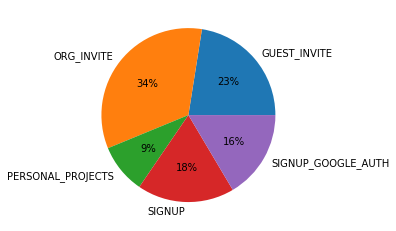

In [48]:
y=np.array(count_of['size'])
label=np.array(count_of['creation_source'])
plt.pie(y,labels = label, autopct='%1.0f%%')

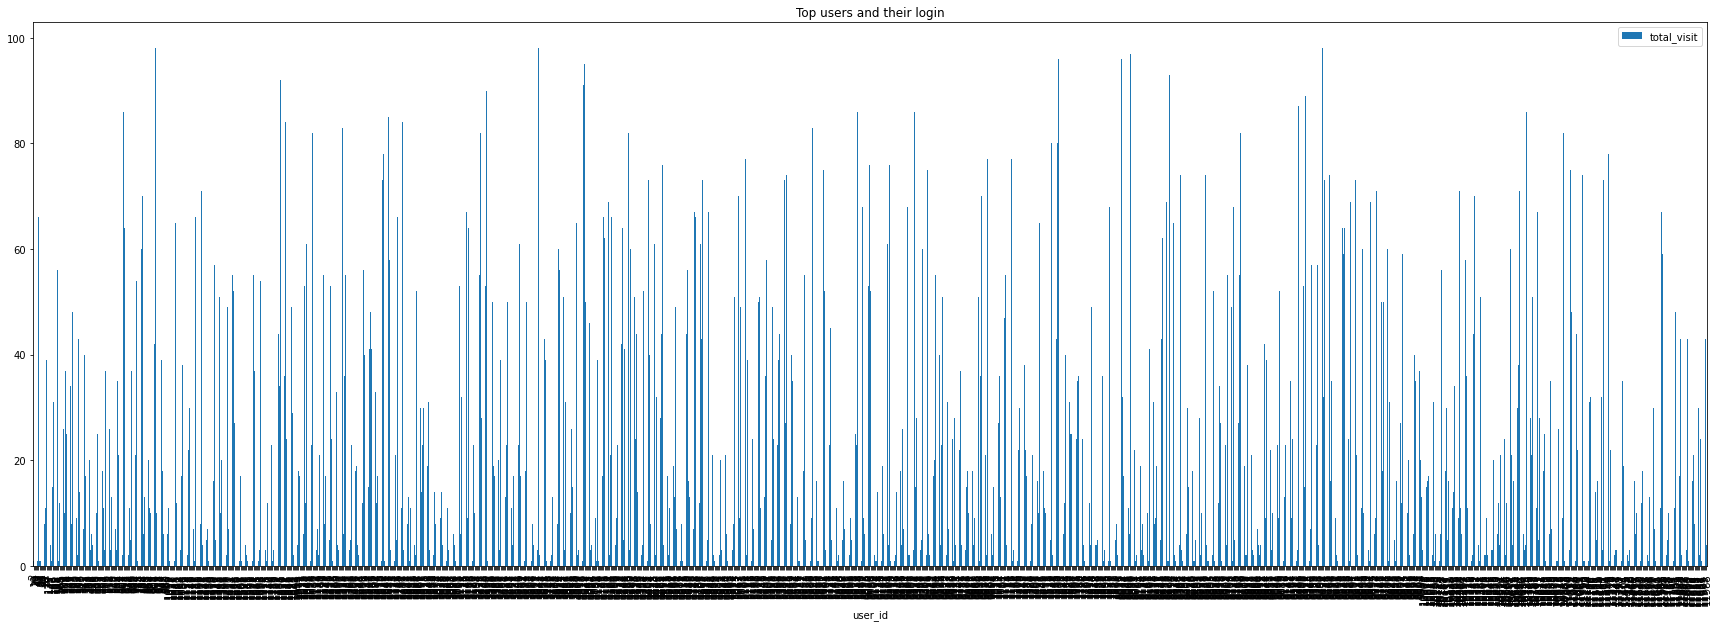

In [52]:
df4=df3
df4=df4.groupby(['user_id','org_id']).size()
df4=df4.to_frame(name='total_visit').reset_index()
V=df4[df4['total_visit'] <=100]
V.plot.bar(x='user_id',y='total_visit',figsize=(30,10),title="Top users and their login")
plt.show()

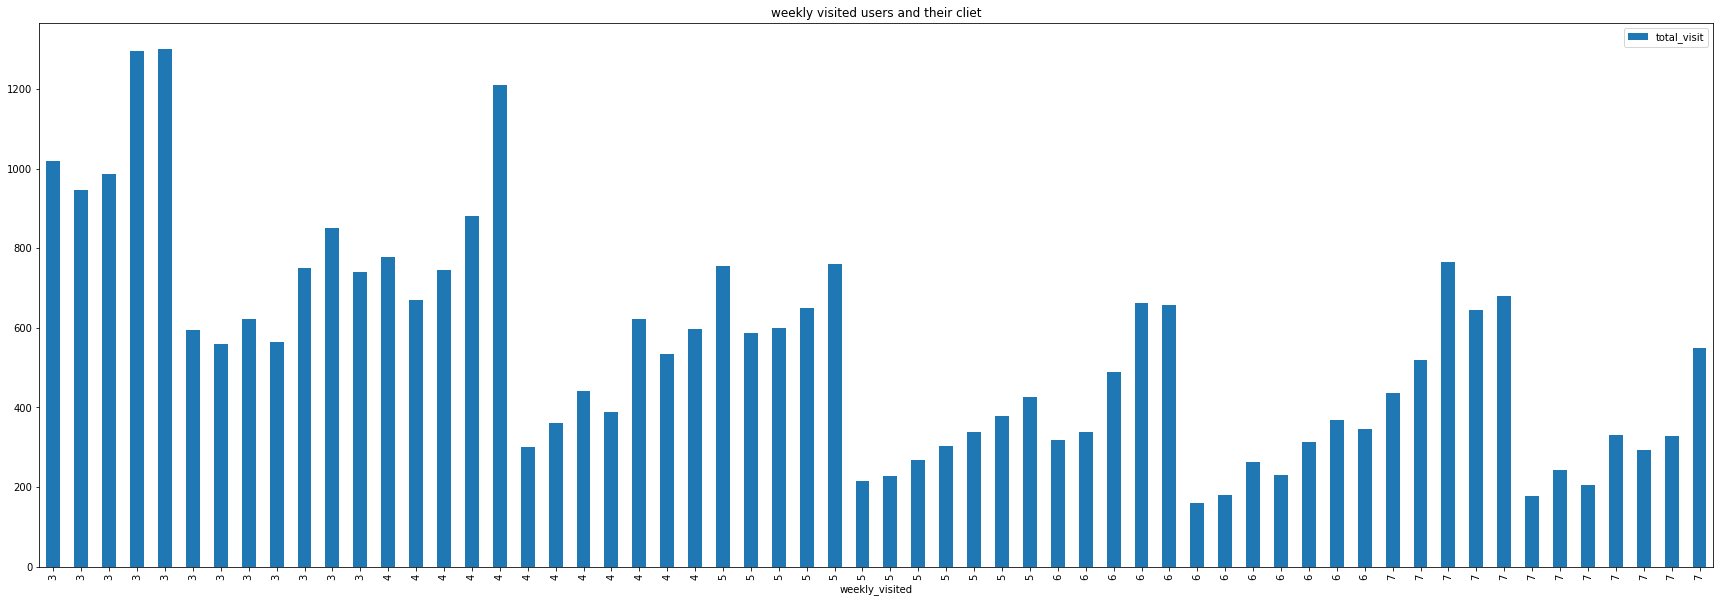

In [56]:
df5=df3
df5=df5.groupby(['weekly_visited','month']).size()
df5=df5.to_frame(name='total_visit').reset_index()
V=df5[df5['total_visit'] >=3]
V.plot.bar(x='weekly_visited',y='total_visit',figsize=(30,10),title="weekly visited users and their cliet")
plt.show()

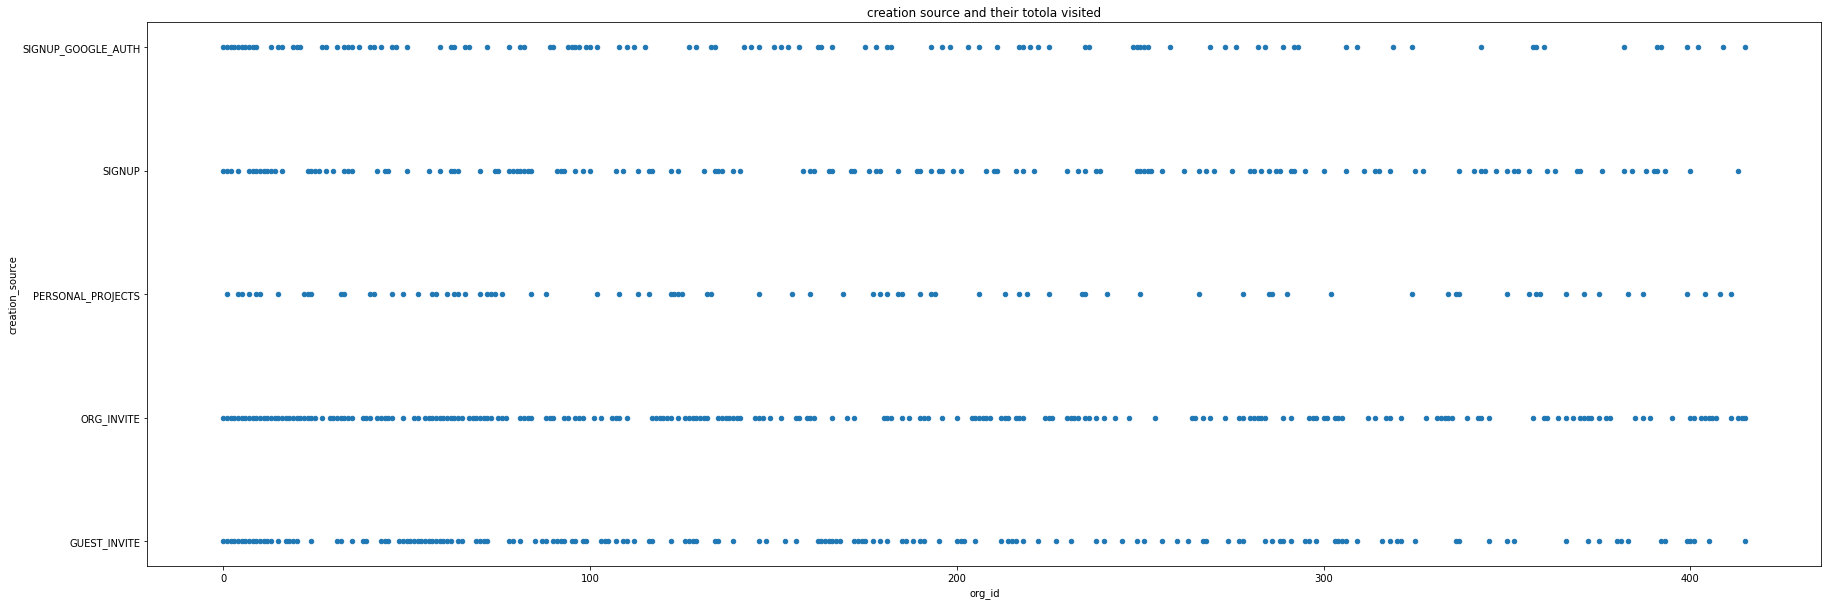

In [60]:
df5=merge_data
df5=df5.groupby(['creation_source','org_id']).size()
df5=df5.to_frame(name='total_visit').reset_index()
V=df5[df5['total_visit'] >=50]
V.plot.scatter(x='org_id',y='creation_source',figsize=(30,10),title="creation source and their totola visited")
plt.show()

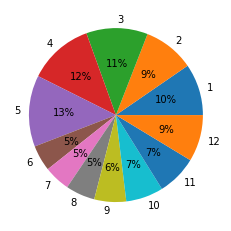

In [61]:
c= merge_data.groupby(['month']).size()
c = c.to_frame(name = 'size').reset_index()
y = np.array(c['size'])
label = np.array(c['month'])
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()